# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.058523e+01     6.508671e+00
 * time: 0.00515294075012207
     1     2.826094e+01     6.670783e+00
 * time: 0.015032052993774414
     2     2.640705e+01     1.065712e+01
 * time: 0.03687691688537598
     3     1.763923e+01     5.480924e+00
 * time: 0.0655050277709961
     4     1.244449e+01     1.519376e+00
 * time: 0.09244298934936523
     5     1.083257e+01     1.183432e+00
 * time: 0.11664509773254395
     6     1.027219e+01     1.823365e+00
 * time: 0.13927102088928223
     7     9.975671e+00     8.294455e-01
 * time: 0.16202402114868164
     8     9.701585e+00     7.820425e-01
 * time: 0.18267202377319336
     9     9.545381e+00     5.310676e-01
 * time: 0.20128798484802246
    10     9.390108e+00     5.192320e-01
 * time: 0.22304010391235352
    11     9.307294e+00     5.093449e-01
 * time: 0.24410510063171387
    12     9.271447e+00     1.035538e+00
 * time: 0.25935792922973633
    13     9.115914e+00     6.918556e-01
 * time:

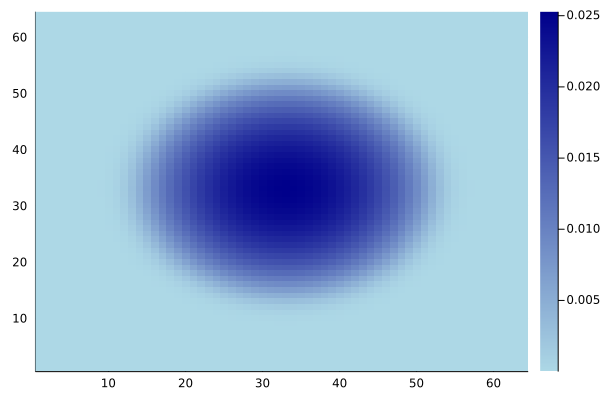

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)